In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch # this for to build the dendo grams
from sklearn.cluster import AgglomerativeClustering
import seaborn as sns

In [3]:
univ =pd.read_csv('Universities.csv')

In [4]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [5]:
def norm_func(i): # this is a user define function to normalize the values 
    x = (i-i.mean())/(i.max()-i.min())# i.mean is the mean of all values in column 
    return x 

In [8]:
univ['SAT'].min(),univ['SAT'].max() # minimum and maximum value for sat column

(1005, 1415)

In [9]:
df_norm = norm_func(univ.iloc[:,1:])

In [10]:
df_norm

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,0.106244,0.173889,-0.226316,0.014737,-0.085364,0.242667
1,0.362341,0.326667,-0.186842,-0.353684,0.659492,-0.190667
2,-0.015707,-0.201111,0.260526,-0.195789,-0.043046,-0.490667
3,0.106244,-0.006667,-0.200000,-0.037895,0.075122,0.042667
4,0.033073,0.090556,-0.081579,0.014737,-0.100672,0.109333
5,0.179415,0.173889,-0.213158,-0.143158,0.087004,0.276000
6,0.118439,0.187778,-0.121053,-0.037895,0.076488,0.276000
7,-0.027902,-0.034444,-0.200000,-0.037895,-0.132347,0.176000
8,0.325756,0.201667,-0.331579,-0.090526,0.221192,0.342667
9,0.094049,-0.020556,0.063158,-0.301053,0.570483,0.009333


In [12]:
# to create the dendrogram


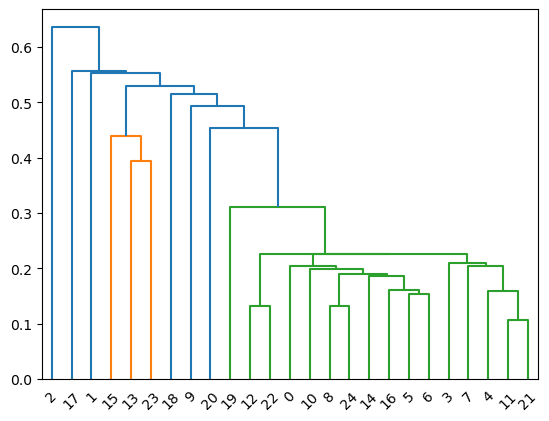

In [13]:
dendrogram =sch.dendrogram(sch.linkage(df_norm,method ='single')) # for single linkage

In [14]:
hc =AgglomerativeClustering(n_clusters =4,metric ='euclidean',linkage ='single')


In [15]:
hc

AgglomerativeClustering(linkage='single', n_clusters=4)

In [16]:
y_hc =hc.fit_predict(df_norm)
Clusters =pd.DataFrame(y_hc,columns =['cluster_no'])

In [18]:
Clusters # there are four cluster are formed which is 0,1,2,3 etc.

,cluster_no
0,0
1,3
2,1
3,0
4,0
5,0
6,0
7,0
8,0
9,0


In [19]:
# make a new column in your existing data set

In [21]:
univ['h_clusterid'] = Clusters

In [22]:
univ

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,h_clusterid
0,Brown,1310,89,22,13,22704,94,0
1,CalTech,1415,100,25,6,63575,81,3
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,0
4,Cornell,1280,83,33,13,21864,90,0
5,Dartmouth,1340,89,23,10,32162,95,0
6,Duke,1315,90,30,12,31585,95,0
7,Georgetown,1255,74,24,12,20126,92,0
8,Harvard,1400,91,14,11,39525,97,0
9,JohnsHopkins,1305,75,44,7,58691,87,0


In [25]:
univ1 = univ.sort_values("h_clusterid")
univ1.iloc[:,[0,7]] # this will extract the 0th column and h_clusterid

,Univ,h_clusterid
0,Brown,0
22,UVA,0
21,UPenn,0
20,UMichigan,0
19,UChicago,0
18,UCBerkeley,0
16,Stanford,0
15,Purdue,0
14,Princeton,0
13,PennState,0
